# World Happiness Data

### Context

This dataset is obtained from Kaggle. I have modified the data to contain only data from 2015 to 2017. This report ranks 155 countries by their happiness level through 6 indicators:

- economic production
- social support
- life expectancy
- freedom
- absence of corruption
- generosity

The last indicator is dystopia residual. Dystopia residual is "the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country". Dystopia is a made up country that has the world's least happiest people. This made up country is high in corruption, low in average income, employment, etc. Dystopia residual is used as a benchmark and should be used side-by-side with the happiness score.

Low dystopia residual = low level of happiness  
high dystopia residual = high level of happiness.

### Read the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dat = pd.read_csv('data/World_Happiness_2015_2017.csv')

In [3]:
dat.head(2)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [4]:
dat.shape

(470, 11)

In [5]:
dat.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                               int64
dtype: object

In [6]:
dat['Year'] = dat['Year'].astype('float')
dat.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                             float64
dtype: object

In [7]:
dat.head(2)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015.0
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015.0


Check for missing Values

In [8]:
dat.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

### Raw Data Plots

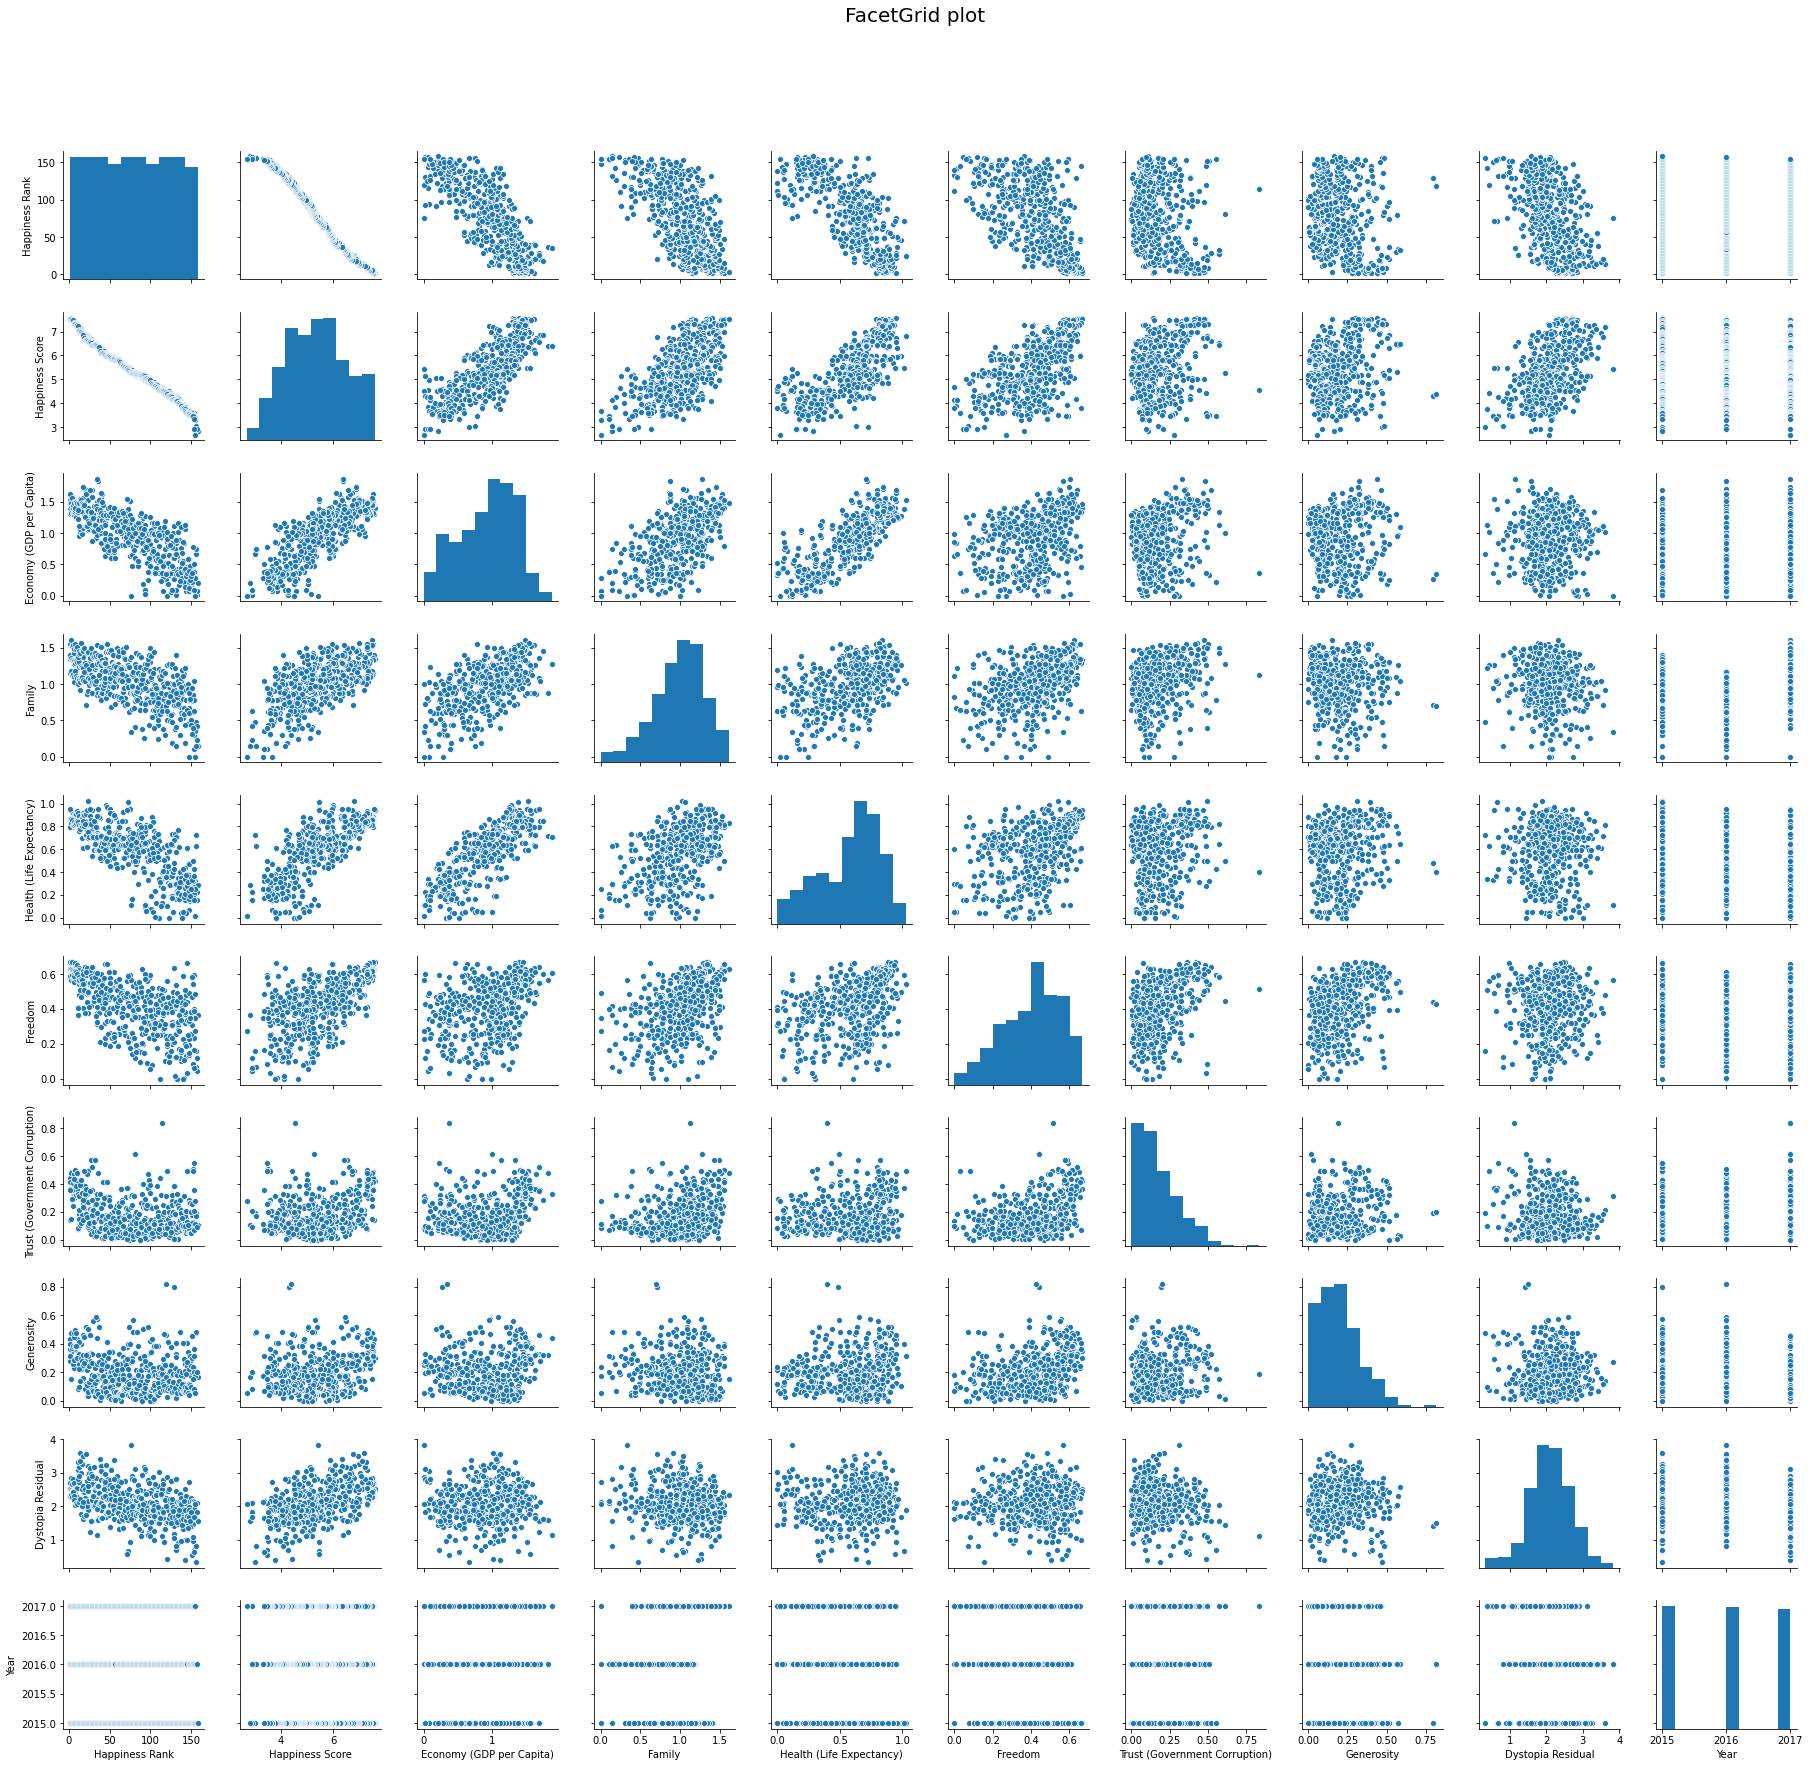

In [9]:
g = sns.pairplot(dat)
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

### Correlation analysis

Determining the correlaction of each of the different features to Happiness Score

In [10]:
correlations = dat.corr()['Happiness Score']
correlations

Happiness Rank                  -0.993268
Happiness Score                  1.000000
Economy (GDP per Capita)         0.785450
Family                           0.636532
Health (Life Expectancy)         0.748040
Freedom                          0.560353
Trust (Government Corruption)    0.282130
Generosity                       0.221684
Dystopia Residual                0.489747
Year                            -0.007761
Name: Happiness Score, dtype: float64

Happines Rank, Happiness Score are the outcomes so lets remove those....

Year is also not one of the factors, so let's also remove it.

In [11]:
correlations = correlations.drop(['Happiness Score', 'Happiness Rank', 'Year']).sort_values(ascending=False)

In [12]:
# count_plot_h is a wrappter for seaborn's barblot, that plots values horizontally, 
# and lables each bar with the value
from data_tools.plotting import count_plot_h

/Users/mmayers/miniconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


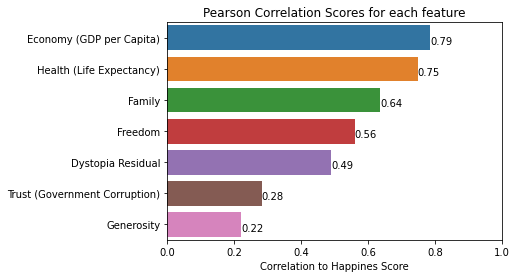

In [13]:
count_plot_h(correlations)
plt.xlim([0, 1])
plt.title('Pearson Correlation Scores for each feature')
plt.xlabel('Correlation to Happines Score');

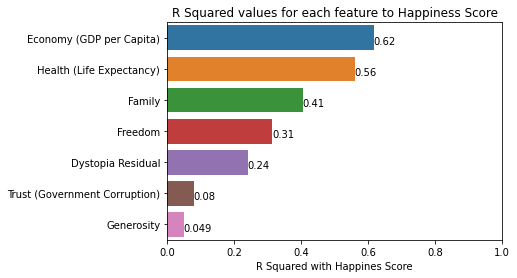

In [14]:
count_plot_h(correlations**2)
plt.xlim([0, 1])
plt.title('R Squared values for each feature to Happiness Score')
plt.xlabel('R Squared with Happines Score');

Economy (GDP per Capita), and Health (Life Expectency) have the greatest correlation to Happiness Score, each explaning over 50% of the variability.

Trust (Corruption) and Generosity, have almost no correlation.

### Regression Plots

This formula: 
    
$ Happiness Score = Economic (GDP per cap) + Family + Health + Freedom + Trust + Generosity + Dystopia Residual $
    
implies that Happiness score is the dependant variable, therefore it should be plotted on the y axis

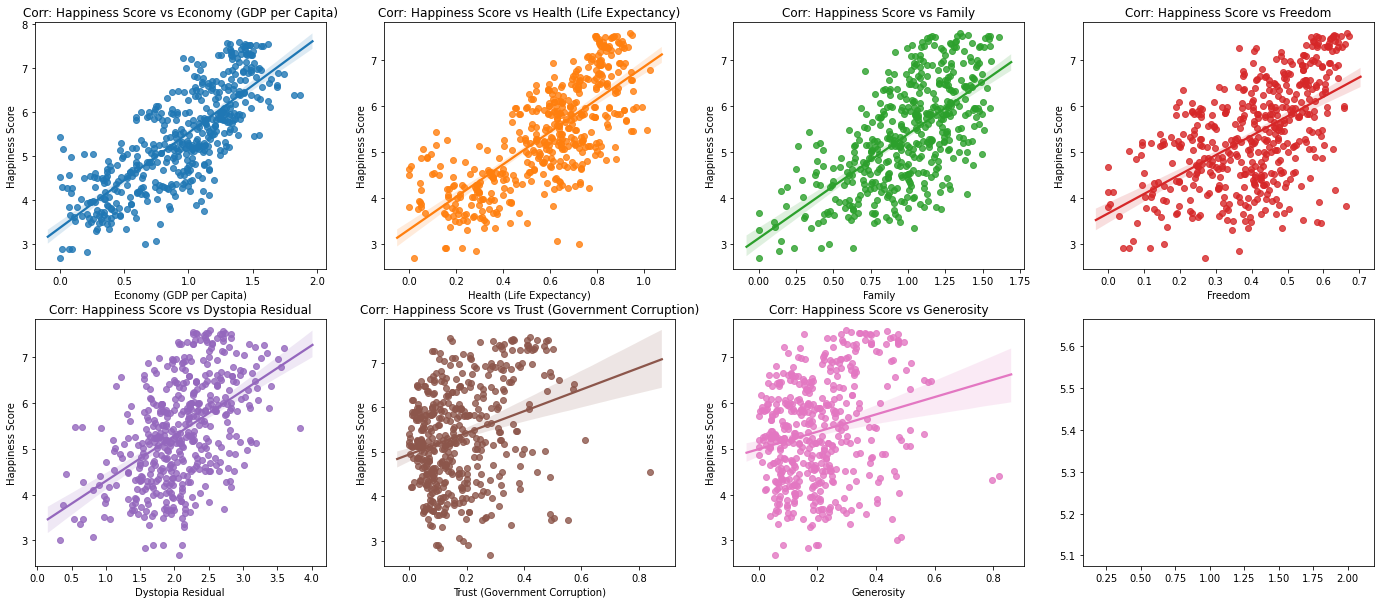

In [19]:
fig, ax = plt.subplots(2, len(correlations)//2 if len(correlations%2)==0 else len(correlations)//2 + 1)
row = 2
col = ax.shape[1]

fig.set_size_inches(6*col, 5*row)

for i, feature in enumerate(correlations.index):
    to_regress = [feature, 'Happiness Score']
    (sns.regplot(y='Happiness Score', x=feature, ax=ax[i//col][i%col], data=dat[to_regress])
        .set_title("Corr: Happiness Score vs {}".format(feature)))

With similar results to the correlation analysis, these regression plots show that GDP per capita and Heath, Life Expepectency have the greatest effect on Happiness Score.

Geneorsity and Government Corruption are very poorly correlated.

## Concluding Remarks

The two items most highly correlated with happiness are a country's GDP per Captia, and the Health, or lifespan of those who live there.

The first item, GDP per person indicates that on average, people in happier countries also have greater wealth, or financial security. When we think of why this may be, financial security has been shown to have positive outcomes on stress levels. This comes in the form of knowing that they have the economic freedom to change jobs, move locations or otherwise improve their situation should it become necessary. Without financial security, fear and uncertainty with regards to negative economic events, like an unexpected loss of income, could lead to increased stress and reduced happiness in individuals.

Similarly, the a country's healthcare system can have profound effects on a person's well-being. In countries without adequate healthcare, illness or injury could result in major complications or death. An injury that prevents an indivual from being able to perform their day to day job may also economic stressors when they are no longer able to work to pay thier bills. In other countries, decent healthcare may come at signficiant cost, resulting in a stressful economic burdeon. In either case, simply having a fear of future illness or injury could even manifest itself as stress, reducing happiness. This would especially be true if an individual has witnessed friends or collegues having negative health outcomes.

EAnalysis of measures of well-being in individuals from countries that have implemented programs like Universal Healthcare or have performed experiments in Universal Basic income could provide further insight into the direct effects of these to factors on a country's overall happiness index.